# Analysis of a Retail Store 

In [1]:
# Importing all the necessary library for the analysis.....
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
# Our data is present on kaggle API to fetch data we need tp install kaggle 
!pip install kaggle

In [3]:
import kaggle
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Importing the zipfile to to open the zip file which, We are able to install 
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') 
zip_ref.extractall()
zip_ref.close()

In [5]:
#We read our file "orders.csv" using read_csv and we will do a 1st hand analysis of data and try to figure about the columns of data
order =  pd.read_csv('orders.csv')
order

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


In [6]:
# After a first hand anlaysis we noticed that we have some entry in segment which have "Not Available" and "unknown" entry
# We will replace both of them by "No Data" 
order=order.replace(to_replace=["Not Available","unknown"],value="No Data")

In [7]:
order.fillna('No Data',inplace = True)

In [8]:
#We can see datatype category of all the columns 
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9994 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [9]:
#Gives us the sahpe of the data set "9994" rows and 16 columns
order.shape

(9994, 16)

In [10]:
#Checking is there any duplicate data is present or not
order.duplicated().sum()

0

## Feature Engineering (for better insights)

In [11]:
#Changing the datatype of "Order Date" from object to datetime for better access 
date =pd.to_datetime(order['Order Date'])

In [12]:
#Removing the old "order date" column 
order=order.drop('Order Date', axis = 1)

In [13]:
#Inserting the new column of "Order Date" after changing it's datatype category with datetime...
order.insert(1,'Order Date',date)

In [14]:
#Converting pandas time_series to date_time and taking out month from the date  
month = order['Order Date'].dt.strftime('%b')

In [15]:
#Inserting new column in data set with name "Order Month" to analysis the sales according to month 
order.insert(2,'Order Month',month)

In [16]:
#Creating new column with "price_diff" percentage 
price_diff = ((order['List Price'] - order['cost price'])/order['cost price'])*100

In [17]:
order.insert(15, 'Price_Diff',price_diff)

### Checking the relation among three variables month, ship mode and count

In [18]:
month_shipment =order.groupby('Order Month')['Ship Mode'].value_counts().reset_index().sort_values('count',ascending = False)
month_shipment

,Order Month,Ship Mode,count
21,Jul,Standard Class,535
4,Aug,Standard Class,533
44,Oct,Standard Class,516
39,Nov,Standard Class,511
8,Dec,Standard Class,507
35,May,Standard Class,503
30,Mar,Standard Class,503
17,Jan,Standard Class,501
0,Apr,Standard Class,482
13,Feb,Standard Class,466


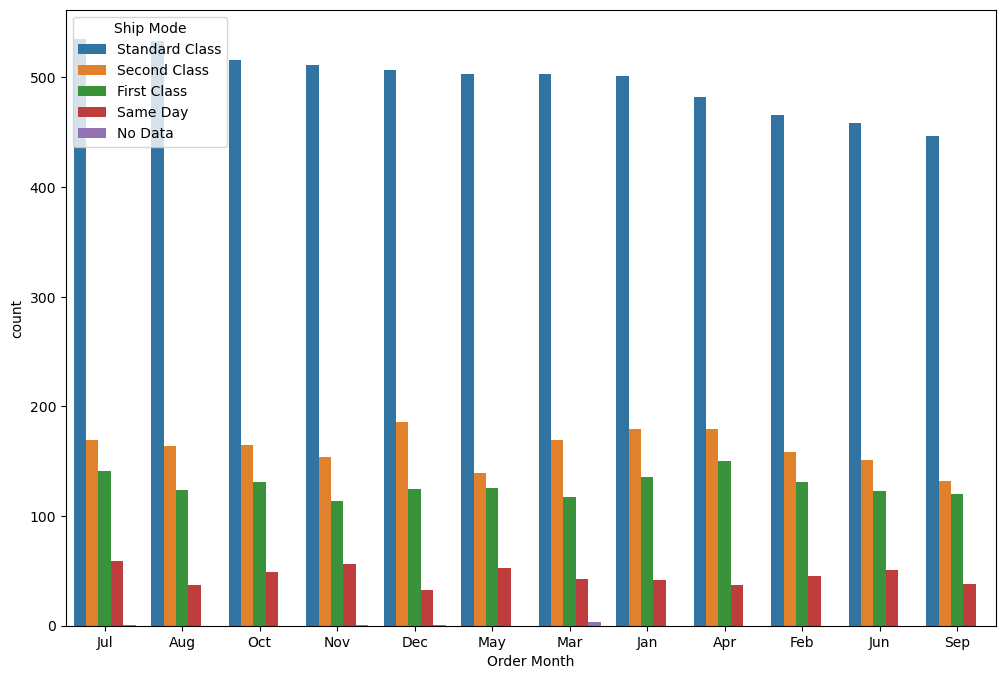

In [19]:
fig, axs = plt.subplots(1,1, figsize = (12,8))
sns.barplot(month_shipment, x="Order Month", y="count", hue="Ship Mode",ax= axs)
plt.show()

In [20]:
order.groupby('Order Month')['Quantity'].sum().reset_index().sort_values('Quantity',ascending = False)

,Order Month,Quantity
5,Jul,3423
10,Oct,3371
1,Aug,3348
2,Dec,3249
8,May,3200
4,Jan,3193
0,Apr,3149
7,Mar,3098
3,Feb,3085
9,Nov,3055


**Conclusion
1. Our major ship mode is standard class and it's very big in count compared to other shipping modes 
3. All months have higher demand of standard class shipping mode 
4. If we look through quantity bases the top 5 month where demand is higher are July,Oct,Aug,Dec,May  

### Analysing  

In [21]:
month_segment=order.groupby('Order Month')['Segment'].value_counts().reset_index().sort_values('count',ascending = False)
month_segment    

,Order Month,Segment,count
15,Jul,Consumer,474
0,Apr,Consumer,463
6,Dec,Consumer,456
30,Oct,Consumer,449
12,Jan,Consumer,439
21,Mar,Consumer,433
27,Nov,Consumer,432
3,Aug,Consumer,425
24,May,Consumer,425
9,Feb,Consumer,421


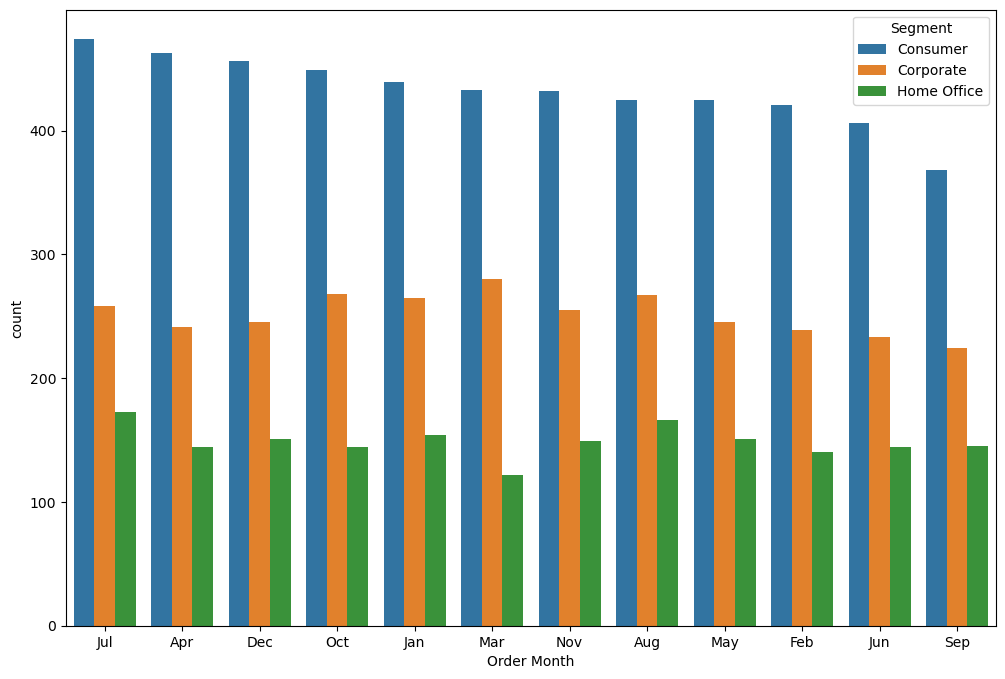

In [22]:
fig, axs = plt.subplots(1,1, figsize = (12,8))
sns.barplot(month_segment, x="Order Month", y="count", hue="Segment",ax= axs)
plt.show()

**Conclusion
1. In consumer segment top three months are July, Apr, Dec
   In corporate segment top three months are Oct, Aug, Jan
   In Home Segment top three months are July, Aug, Jan

In [23]:
state_order_id = order.groupby('City')['State'].value_counts().reset_index().sort_values('count', ascending = False).head(30)
state_order_id

,City,State,count
380,New York City,New York,915
312,Los Angeles,California,747
430,Philadelphia,Pennsylvania,537
503,San Francisco,California,510
517,Seattle,Washington,428
239,Houston,Texas,377
90,Chicago,Illinois,314
502,San Diego,California,170
126,Dallas,Texas,157
107,Columbus,Ohio,120


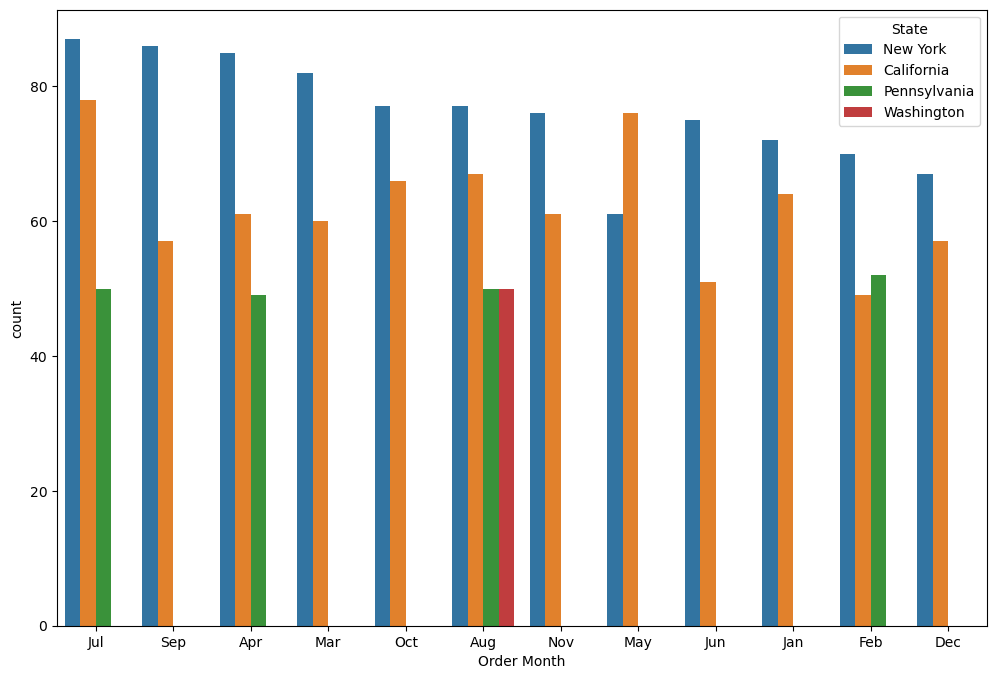

In [24]:
state_order_month = order.groupby(['City','Order Month'])['State'].value_counts().reset_index().sort_values('count', ascending = False).head(30)
fig, axs = plt.subplots(1,1, figsize = (12,8))
sns.barplot(state_order_month, x="Order Month", y="count", hue="State",ax= axs)
plt.show()

**Conclusion
1. In our top 30 list of citys which has heighest count of product,We can see New York, california, Pennsylvania, Washington
2. Our top three month where the demand is high are July, Sep, Apr
3. September, March, October,November,May,June, January, December shows no demand from Pennsylvania
4. May is the only month where California crosses the demand of New York, excluding May all month shows New York at the top.
5. August is the only month which shows demand from all 4 state 
6. City from where the most demand came are New york City, Los Angeles, San Francisco(california),Philadelphia('Pennsylvania'), Seattle(Washington)

### Analysing orders category, Sub category and their demand in market

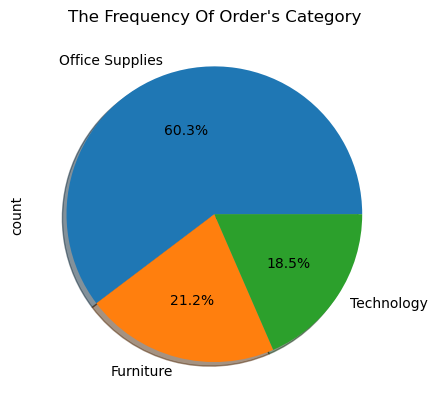

In [25]:
#month_category = order.groupby(['Order Month','Category'])['Sub Category'].value_counts().reset_index()
order['Category'].value_counts().plot(kind = 'pie',autopct = "%0.1f%%",title = "The Frequency Of Order's Category",shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.show()

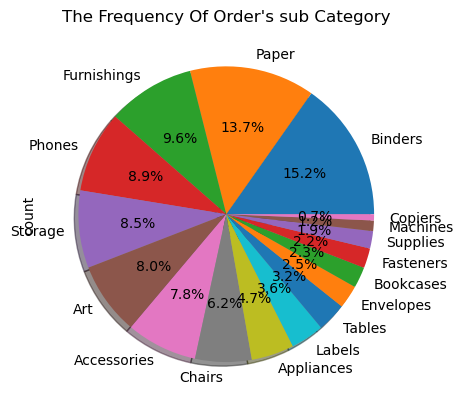

In [26]:
order['Sub Category'].value_counts().plot(kind = 'pie',autopct = "%0.1f%%",title = "The Frequency Of Order's sub Category",shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.show()

In [27]:
month_category = order.groupby(['Order Month','Category'])['Sub Category'].value_counts().reset_index().sort_values('count',ascending = False)
month_category.head(30)

,Order Month,Category,Sub Category,count
140,May,Office Supplies,Binders,140
89,Jul,Office Supplies,Binders,139
90,Jul,Office Supplies,Paper,137
72,Jan,Office Supplies,Binders,131
157,Nov,Office Supplies,Binders,131
174,Oct,Office Supplies,Binders,129
21,Aug,Office Supplies,Binders,129
38,Dec,Office Supplies,Binders,129
73,Jan,Office Supplies,Paper,127
123,Mar,Office Supplies,Paper,126


In [28]:
order.groupby('Category')['Sub Category'].value_counts()

Category         Sub Category
Furniture        Furnishings      957
                 Chairs           617
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: count, dtype: int64

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


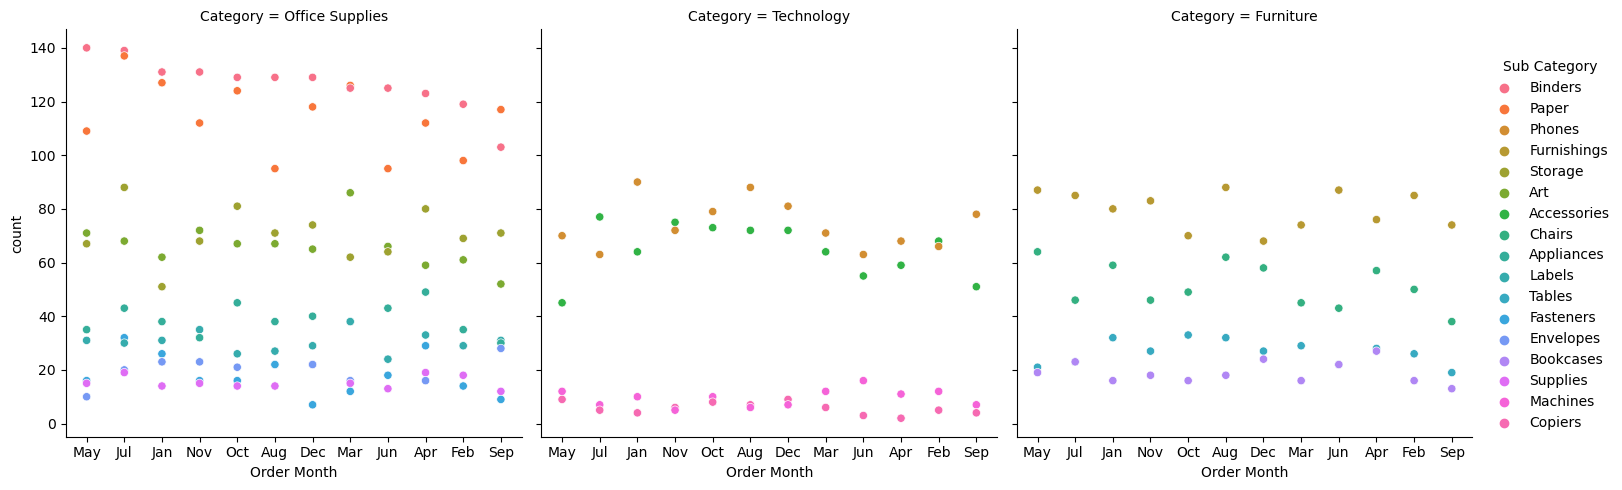

In [29]:
sns.relplot(
    data=month_category,
    x="Order Month", y="count", hue="Sub Category", col="Category",
)
plt.show()

**Conclusion
1. If we look for the category we can say that office supplies covers 60% of our supply chain, then comes the furnitures with      21% and then technology with 18% share
2. Sub category our top five products are Binders(office), papers(office), phones(tech), furnishings(furniture),storage(office) 
3. Our top 5 lowest demand product is copiers,Machines,Supplies,Fasteners,Bookcases

### Monthly list price, cost price and price diff analysis 

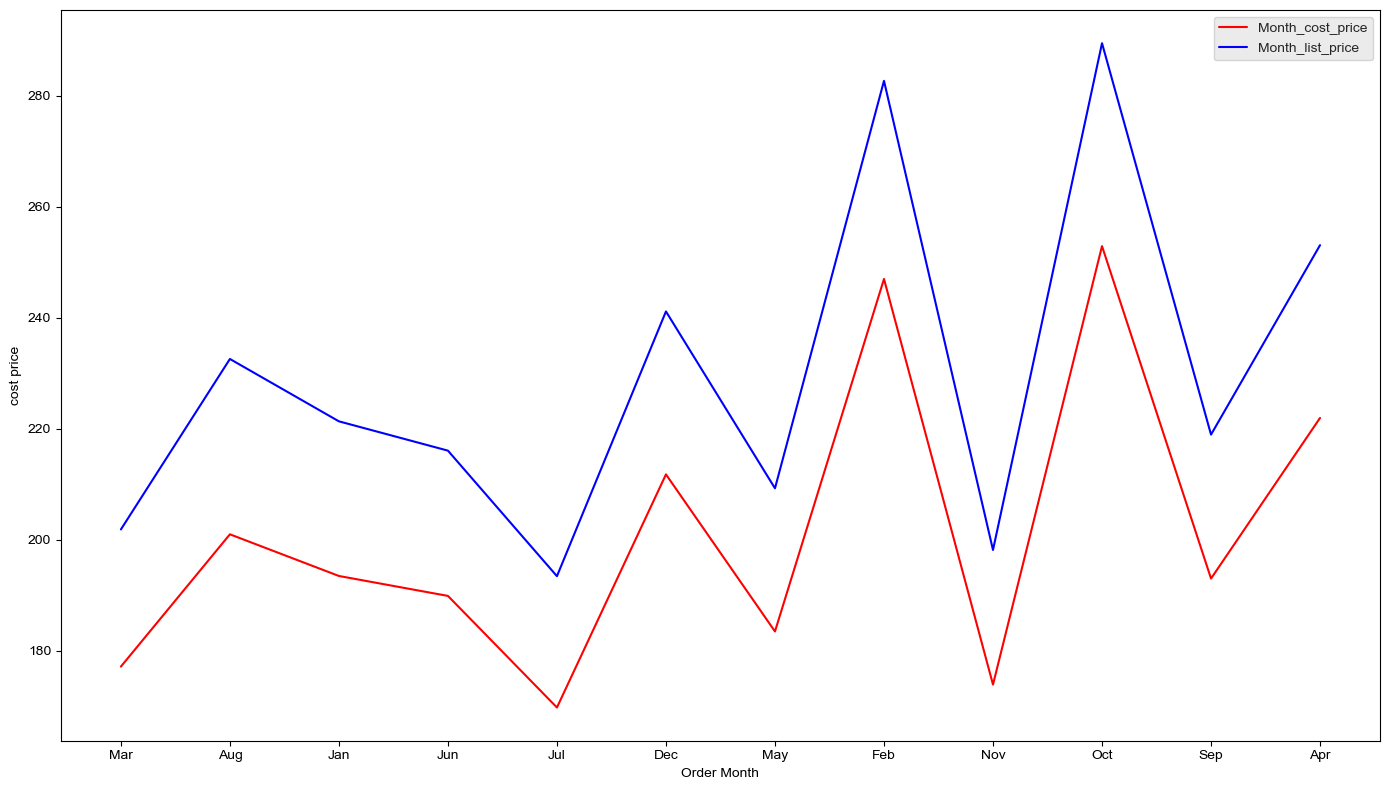

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=order,x ='Order Month',y='cost price',ax=axs,color='red',label ='Month_cost_price',errorbar=None)
sns.lineplot(data=order,x ='Order Month',y='List Price',ax=axs,color='blue',label ='Month_list_price',errorbar=None)
#sns.lineplot(data=order,x ='Order Month',y='Selling_Price',ax=axs,color='green',label ='Selling_Price',errorbar=None)
plt.tight_layout()
plt.show()

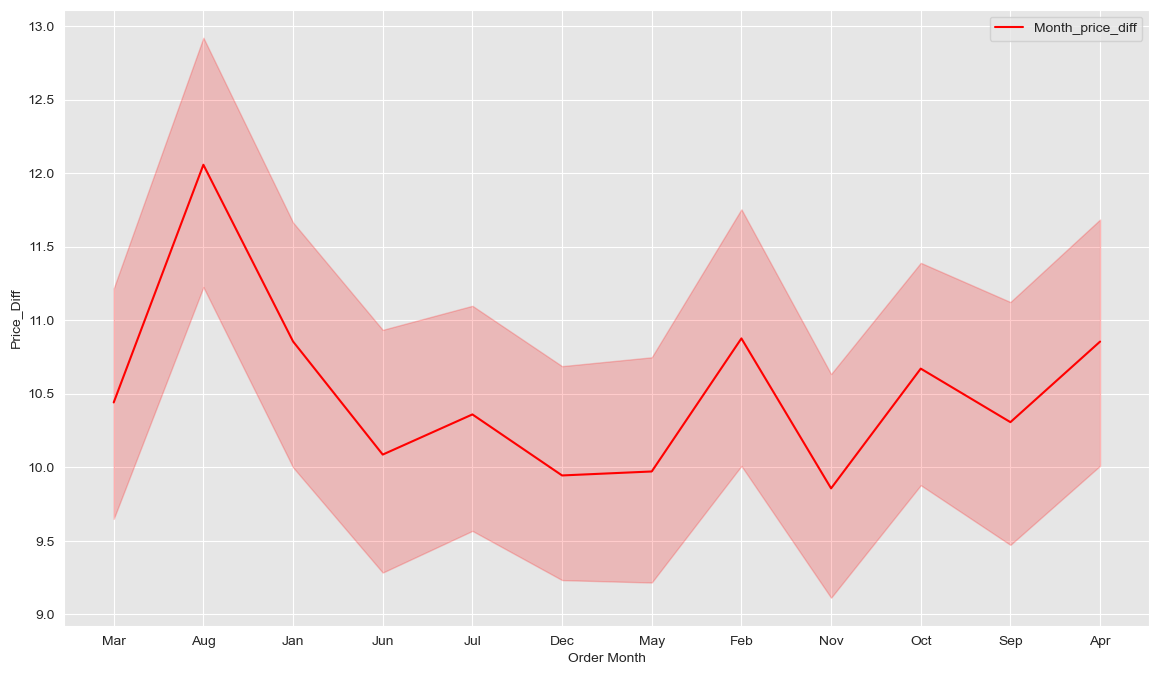

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=order,x ='Order Month',y='Price_Diff',ax=axs,color='red',label ='Month_price_diff')
plt.show()

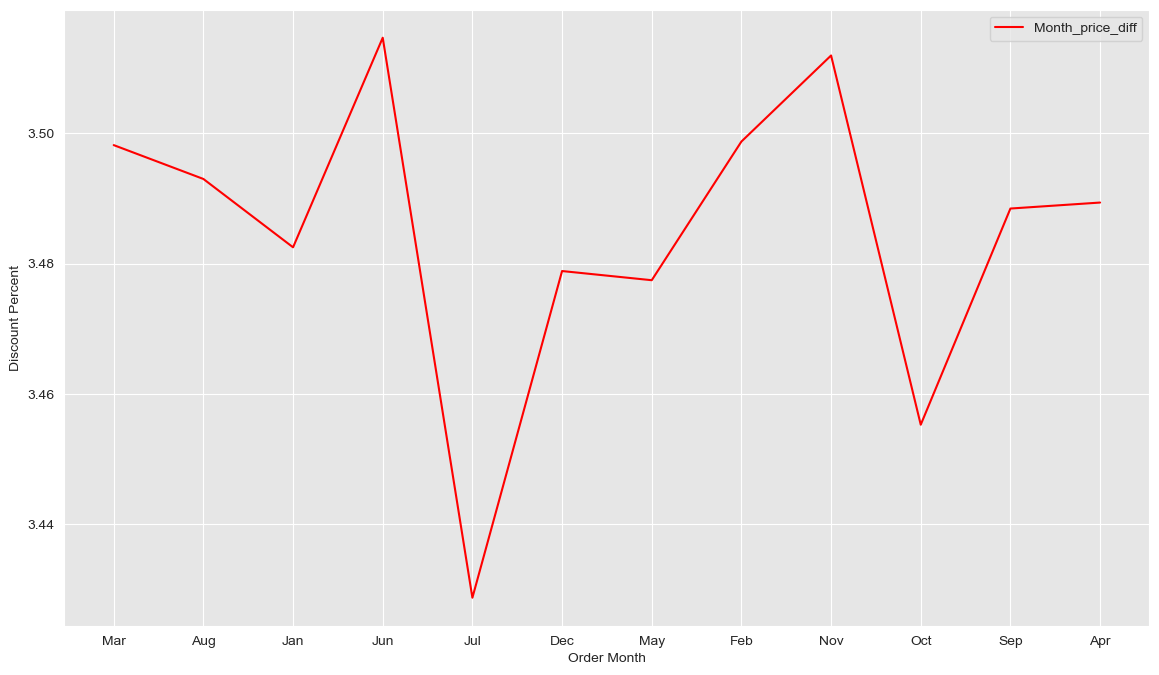

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=order,x ='Order Month',y='Discount Percent',ax=axs,color='red',label ='Month_price_diff',errorbar=None)
plt.show()

**Conclusion
1. When we plot both cost price and list price we see both graphs are almost symmetrical,Aug, Feb, Oct are the months where we    listed the highest price
2. The graph which shows us the difference between list price and cost price and it peaks on Aug and show bottom on Nov
3. Dec to May there is no major change in price difference
4. When t comes about discount the peak is on June and Nov month and the bottom is on July and Oct, Dec to May we dont't see      major change in discount perentage

### Segment demand and relation with discounts

In [33]:
segment_qt=order.groupby('Segment')['Quantity'].value_counts().reset_index()
segment_qt['Total_Qty'] = segment_qt['Quantity']*segment_qt['count']
segment_qt.sort_values('Total_Qty',ascending = False)
segment_qt = segment_qt.groupby('Segment')['Total_Qty'].sum().reset_index()
segment_qt

,Segment,Total_Qty
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [34]:
segment_discount = order.groupby('Segment')['Discount Percent'].value_counts().reset_index().sort_values('Discount Percent',ascending = False)
segment_discount

,Segment,Discount Percent,count
3,Consumer,5,1245
7,Corporate,5,728
9,Home Office,5,459
2,Consumer,4,1302
4,Corporate,4,785
11,Home Office,4,410
1,Consumer,3,1314
6,Corporate,3,753
8,Home Office,3,475
0,Consumer,2,1330


**Conclusion
1. Most demanding segment is of consumers, then corporate and then home office
2. We have total 4 slabs of discount 5%,4%,3%,2% in all the slab the oorder of segment remain same

In [35]:
cat_discount = order.groupby(['Category','State','Sub Category'])['Discount Percent'].value_counts().reset_index().sort_values('Discount Percent', ascending = False)
#,'Order Month'

In [36]:
cat_discount.sort_values('count', ascending = False).head(25)

,Category,State,Sub Category,Discount Percent,count
517,Office Supplies,California,Binders,5,78
533,Office Supplies,California,Paper,5,76
518,Office Supplies,California,Binders,2,76
534,Office Supplies,California,Paper,3,75
535,Office Supplies,California,Paper,2,71
536,Office Supplies,California,Paper,4,67
520,Office Supplies,California,Binders,3,61
519,Office Supplies,California,Binders,4,61
40,Furniture,California,Furnishings,4,58
1105,Office Supplies,New York,Binders,3,55


**Conclusion
Binders and papers in sub category of office supply is in more demand compared to other product in all slabs of discount, and if we see the data carefully our major consumer do not care about the discount because when we have given the higher % discount they did not order large amount they book oder when they feel the need.

### Creating a function for analysis based on city and postal code 

In [37]:
segment_qty_area=order.groupby(['Segment','State','City','Postal Code'])['Quantity'].sum().reset_index().sort_values('Quantity',ascending = False)

In [38]:
def get_details_by_city_and_postal_code(df, city, postal_code):    
    # Apply filtering conditions
    filtered_df = df[(df['City'] == city) & (df['Postal Code'] == postal_code)]
    
    # Select relevant columns to return
    result = filtered_df[['Segment', 'State','Quantity']]
    return result

In [39]:
#order = pd.DataFrame(data)
city_input = 'New York City'
postal_code_input = 10009

result = get_details_by_city_and_postal_code(segment_qty_area, city_input, postal_code_input)
pd.DataFrame(result)

,Segment,State,Quantity
323,Consumer,New York,458
763,Corporate,New York,230
1134,Home Office,New York,160


### Segment  ship mode count analysis

In [40]:
 order.groupby('Segment')['Ship Mode'].value_counts().reset_index().sort_values('count',ascending = False)

,Segment,Ship Mode,count
0,Consumer,Standard Class,3081
5,Corporate,Standard Class,1811
10,Home Office,Standard Class,1070
1,Consumer,Second Class,1020
2,Consumer,First Class,769
6,Corporate,Second Class,609
7,Corporate,First Class,485
3,Consumer,Same Day,317
11,Home Office,Second Class,316
12,Home Office,First Class,284


In [41]:
ship_mode_cat_count =order.groupby(['Ship Mode','Category'])['Category'].value_counts().reset_index().sort_values('count',ascending = False)
ship_mode_cat_count

,Ship Mode,Category,count
13,Standard Class,Office Supplies,3635
12,Standard Class,Furniture,1246
10,Second Class,Office Supplies,1152
14,Standard Class,Technology,1081
1,First Class,Office Supplies,910
9,Second Class,Furniture,427
11,Second Class,Technology,366
0,First Class,Furniture,327
7,Same Day,Office Supplies,326
2,First Class,Technology,301


**Conclusion
Highest number of shipment is still going through Standard class for all 3 segment,after std class we can see second class and first class.In standard class shipment office supply is at top, then comes the furniture category and then comes tech category  the same order of category followed for differnt class segment.We can see the graph just below which justify the statement.

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


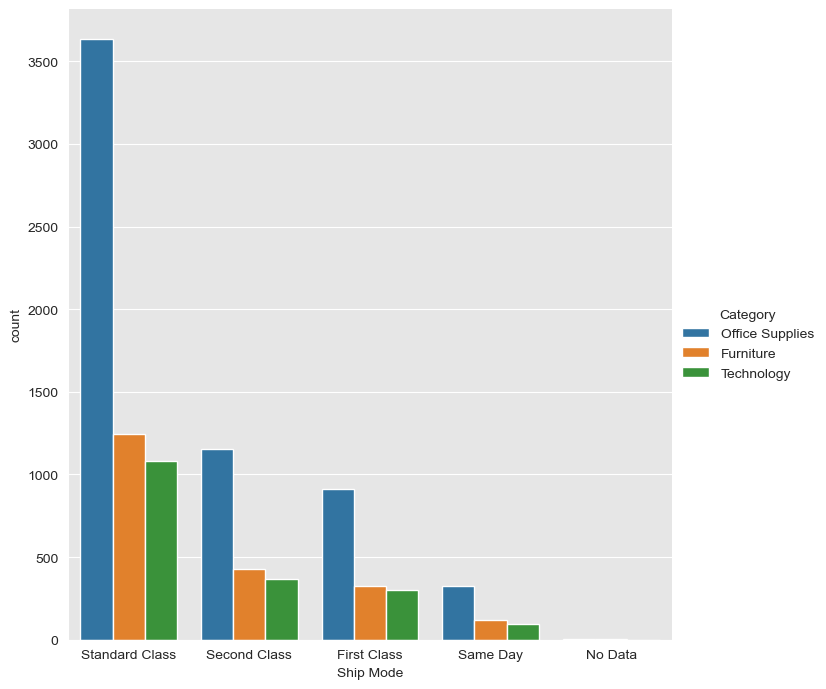

In [42]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#sns.relplot(data=ship_mode_cat_count, x="Ship Mode", y="count", hue="Category", kind="line")
sns.catplot(data=ship_mode_cat_count, x="Ship Mode", y="count", hue="Category", kind="bar", height= 7,aspect=1)
plt.show()

### Analysing data according to region  

In [43]:
ship_qty_region=order.groupby(['Ship Mode','Region'])['Quantity'].value_counts().reset_index()
ship_qty_region['Total_count'] = ship_qty_region['Quantity']*ship_qty_region['count']
ship_qty_region.sort_values('Total_count',ascending = False)

,Ship Mode,Region,Quantity,count,Total_count
190,Standard Class,West,3,456,1368
192,Standard Class,West,5,242,1210
163,Standard Class,East,3,401,1203
148,Standard Class,Central,3,356,1068
150,Standard Class,Central,5,188,940
...,...,...,...,...,...
79,Same Day,South,1,5,5
48,No Data,Central,5,1,5
52,No Data,West,4,1,4
53,No Data,West,3,1,3


G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


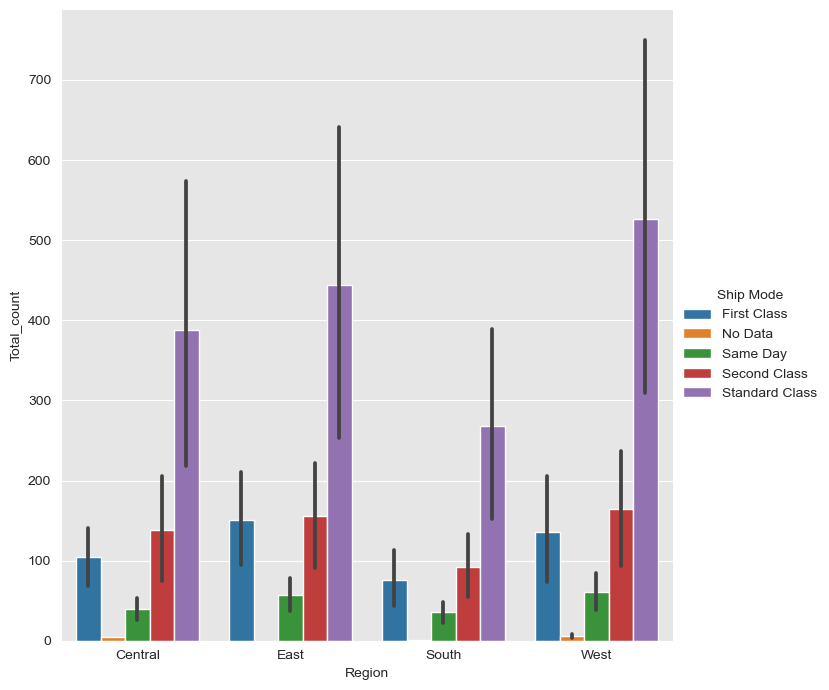

In [44]:
sns.catplot(data=ship_qty_region, x="Region", y="Total_count", hue="Ship Mode", kind="bar", height= 7,aspect=1)

**Conclusion
1. If we see the demand by count we can say that standard class has the highest demand among all region
2. Central region shows lowest demand by number in standard class and west shows highest demand among all region
3. Second class comes at second postion among all class shipment.

In [45]:
seg_city_price =order.groupby(['Segment','Category','Sub Category','City'])['Price_Diff'].mean().reset_index().sort_values('Price_Diff', ascending = False)

In [46]:
def seg_cat_price_diff_city(df):
    city = input('Enter the City :')
    sub_cat = input('Enter the Sub Category :')
    feature_data = df[(df['City'] == city) & (df['Sub Category']==sub_cat)]
    result = feature_data[['Segment','Category','Sub Category','City','Price_Diff']]
    return result

In [47]:
#seg_cat_price_diff_city(seg_city_price)

In [48]:
# Doing feature engineering for getting better insight from data we are creating a selling price column 
sp = (order['List Price']*(100-order['Discount Percent']))/100
order.insert(15,'Selling_Price',sp)

In [49]:
# Creating a column of profit & loss from given data  
profit =((order['Selling_Price']-order['cost price'])/order['cost price'])*100
order.insert(16,'Profit_Loss',profit)

In [50]:
profit_loss_state_cat_seg=order.groupby(['Segment','Category','State'])['Profit_Loss'].mean().reset_index().sort_values('Profit_Loss', ascending=False)

<Axes: xlabel='Profit_Loss', ylabel='Density'>

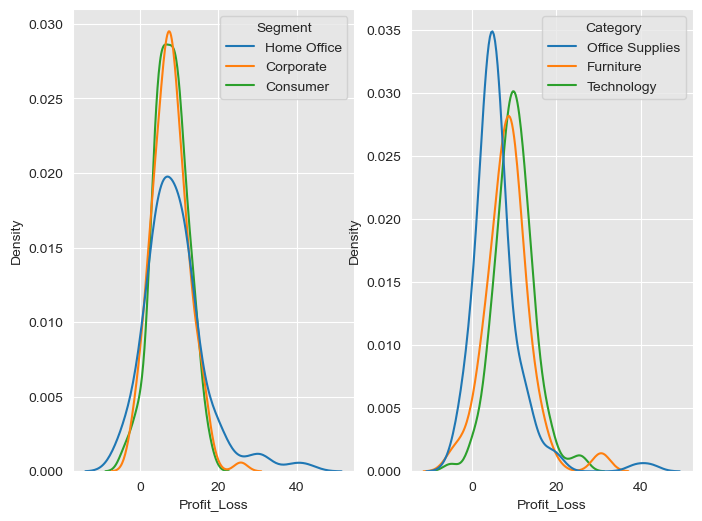

In [51]:
#kind="kde
fig, axs = plt.subplots(1,2,figsize=(8,6))
sns.kdeplot(profit_loss_state_cat_seg, x="Profit_Loss", hue="Segment",  ax =axs[0])
sns.kdeplot(profit_loss_state_cat_seg, x="Profit_Loss", hue="Category", ax=axs[1])

**Conclusion
*SEGMENT
1. Heighest density of profit lies between (0 to 20) and corporate and consumer segment has heigher density in this range 
2. Home Office has less density but has higher profit spread

*CATEGORY
1. Office supplies has highest density and furniture and technology has almost close to each other and office supply has a 
   slight peak and even furniture also shows aslight peak

In [52]:
profit_loss_price_diff = order.groupby(['Segment','Category','State'])['Price_Diff'].sum().reset_index()
profit_loss_dis = order.groupby(['Segment','Category','State'])['Discount Percent'].mean().reset_index()
profit_loss_qty = order.groupby(['Segment','Category','State'])['Quantity'].sum().reset_index()

In [53]:
pd.set_option('display.max_rows', None)
Top_performer=profit_loss_state_cat_seg.sort_values("Profit_Loss", ascending = False).head(50)
Top_performer.insert(4,'Price_Diff %',profit_loss_price_diff['Price_Diff'])
Top_performer.insert(5,'Discount_mean',profit_loss_dis['Discount Percent'])
Top_performer.insert(6,'Quantity_sum',profit_loss_qty['Quantity'])


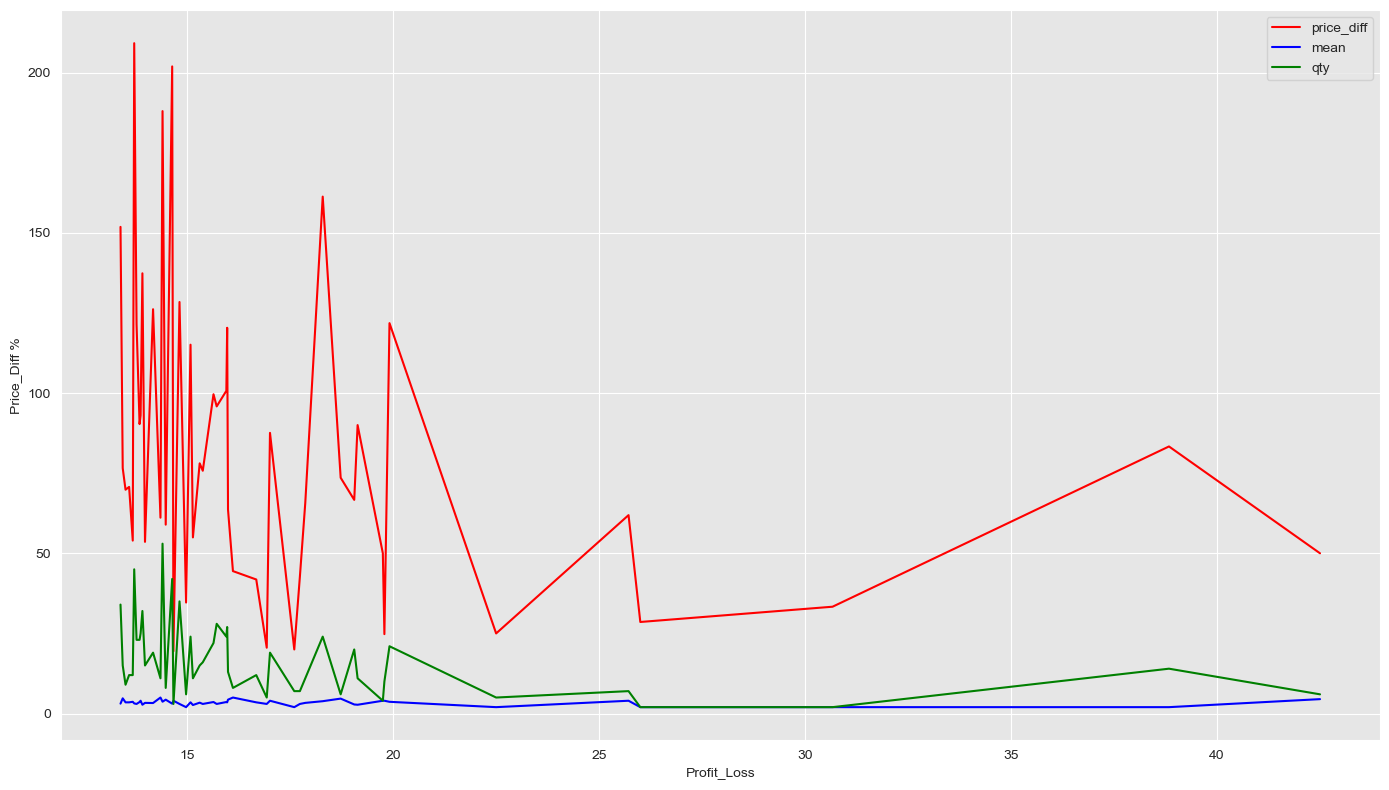

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.lineplot(data=Top_performer,x ='Profit_Loss',y='Price_Diff %',ax=axs,color='red',label ='price_diff')
sns.lineplot(data=Top_performer,x ='Profit_Loss',y='Discount_mean',ax=axs,color='blue',label ='mean')
sns.lineplot(data=Top_performer,x ='Profit_Loss',y='Quantity_sum',ax=axs,color='green',label ='qty')
plt.tight_layout()
plt.show()

**Conclusion
1. After analysing we can say that higher quantity results to higher price diff

2. If we see Home office segment top performing state in different category

   a. Office Supply: North Dakota,columbia,Nevada
   
   b. Furniture: Columbia,kansas,Idaho
   
   c.Technology: Arkansas,Alabama,Nebraska
   
3. In consumer segment

   a.Technology: South Carolina	,Montana ,Connecticut
   
   b.Furniture: New Mexico, Wisconsin,Oklahoma
   
   c.Office Supply: North Dakota,Montana
   
4. In Corporate segment

   a. Technology: Nebraska,Oregon,Nevada
   
   b. Furniture: Vermont,Nevada,Alabama
   
   c. Office Supply: New Hampshire, Montana, New Mexico	

In [55]:
loss_makers=profit_loss_state_cat_seg.sort_values("Profit_Loss").head(100)
loss_makers.insert(4,'Discount_mean',profit_loss_dis['Discount Percent'])
loss_makers.insert(5,'Price_Diff %',profit_loss_price_diff['Price_Diff'])
loss_makers.insert(6,'Quantity_sum',profit_loss_qty['Quantity'])
loss_makers

,Segment,Category,State,Profit_Loss,Discount_mean,Price_Diff %,Quantity_sum
286,Home Office,Furniture,New Jersey,-5.000000,5.000000,0.000000,4
362,Home Office,Technology,Maryland,-5.000000,5.000000,0.000000,3
280,Home Office,Furniture,Mississippi,-4.000000,4.000000,0.000000,4
284,Home Office,Furniture,Nevada,-4.000000,4.000000,0.000000,2
82,Consumer,Office Supplies,South Dakota,-4.000000,4.000000,0.000000,10
51,Consumer,Office Supplies,District of Columbia,-3.500000,3.500000,0.000000,10
326,Home Office,Office Supplies,Nebraska,-3.000000,3.000000,0.000000,13
143,Corporate,Furniture,Iowa,-2.000000,2.000000,0.000000,7
339,Home Office,Office Supplies,South Carolina,-2.000000,2.000000,0.000000,4
54,Consumer,Office Supplies,Idaho,-1.666667,3.250000,6.666667,12


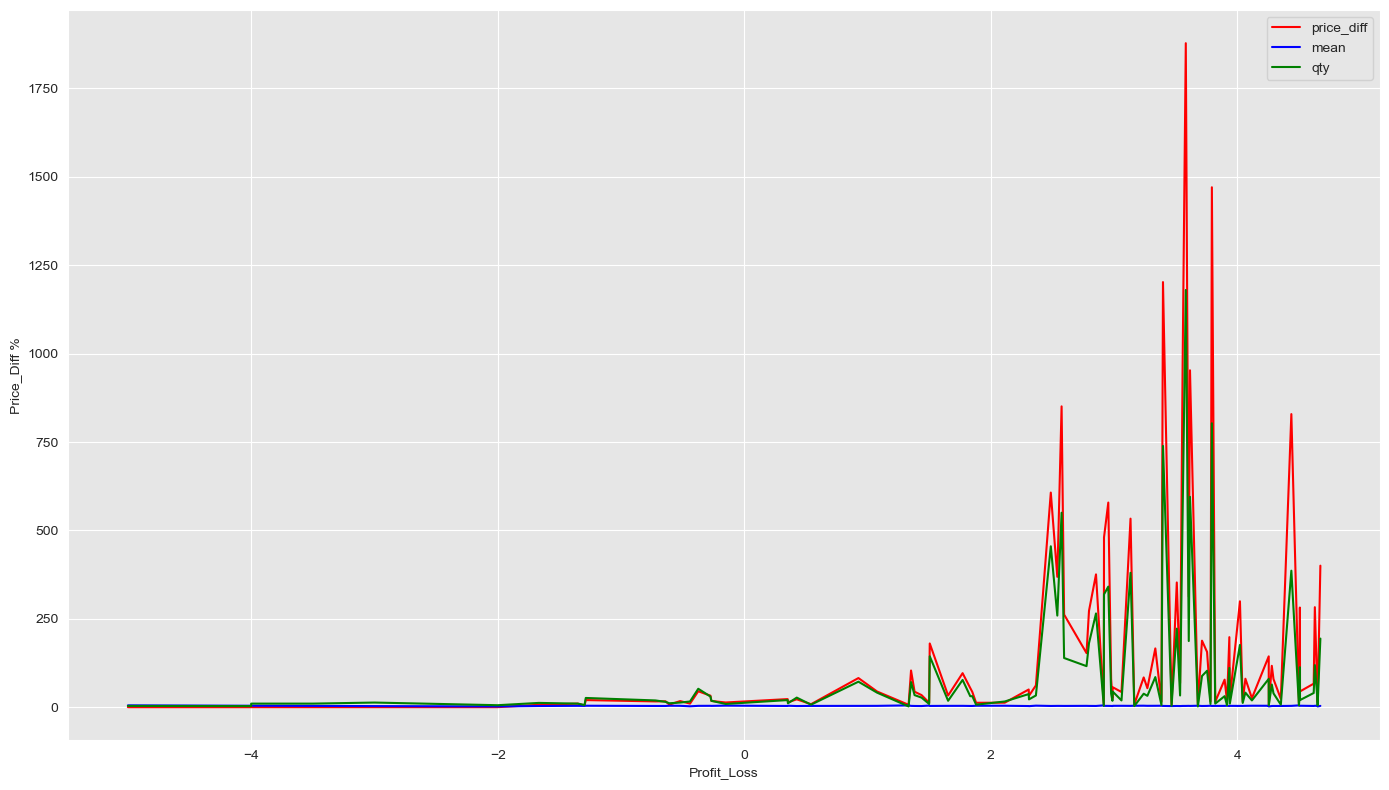

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
sns.lineplot(data=loss_makers,x ='Profit_Loss',y='Price_Diff %',ax=axs,color='red',label ='price_diff')
sns.lineplot(data=loss_makers,x ='Profit_Loss',y='Discount_mean',ax=axs,color='blue',label ='mean')
sns.lineplot(data=loss_makers,x ='Profit_Loss',y='Quantity_sum',ax=axs,color='green',label ='qty')
plt.tight_layout()
plt.show()

**Conclusion
1. After analysing we can say that higher discount mean and low price diff is a not good for profit

2. If we see Home office segment worst performing state in different category

   a. Furniture: New Jersey,Mississippi,Nevada
   
   b. Technology: Maryland,Indiana,Louisiana
   
   c. Office Supply: Nebraska,South Carolina,Idaho
   
3. In Consumer segment

   a.Office Supplies: South Dakota, Columbia,Idaho
   
   b.Furniture: Iowa,Nebraska,Vermont
   
   c.Technology: Arkansas,Kansas
   
4. In Corporate segment

   a.Furniture:Iowa,Minnesota,Mississippi
   
   b.Office Supplies:Oklahoma,Iowa,Kansas
   
   c.Technology:Kansas,Mississippi,Maine